In [538]:
import tabula
import pandas as pd
from unidecode import unidecode
import matplotlib.pyplot as plt

In [477]:
files = {
    2014: {
        "1-sem": {
            "theory": "Taxasdeaprovacao_1_Semestre_2014_Teoricas_Integradas.pdf",
            "driving": "Taxasdeaprovacao_1_Semestre_2014_Praticas_Integradas.pdf"
        },
        "2-sem": {
            "theory": "Taxasdeaprovacao_2_Semestre_2014_Teoricas_Integradas.pdf",
            "driving": "Taxasdeaprovacao_2_Semestre_2014_Praticas_Integradas.pdf"
        }
    },    
    2015: "TaxasApr_2015_Relatorio_Escolas_de_Condução.pdf",
    2016: "TaxasApr_2016_Relatorio_EscolasDeConducao.pdf",
    2017: "TaxasApr_2017_Relatorio_EscolasDeConducao.pdf",
    2018: "TaxasApr_2018_Relatorio_EscolasDeConducao.pdf",
    2019: {"1-sem": "TaxasAp_PP_1sem2019.pdf"}
}


In [478]:
files[2015]

'TaxasApr_2015_Relatorio_Escolas_de_Condução.pdf'

In [514]:
def parse_rate (x):
    
    if x == '#DIV/0!':
        return 0
    elif pd.isna(x):
        return x
    else:
        return float((x.replace(',', '.').replace('%', 'e-2')))
    
def name_to_keyword(x):
    s = unidecode(x) \
    .lower() \
    .replace('>', '') \
    .replace('<', '') \
    .replace('(', '') \
    .replace(')', '') \
    .replace(' ', '_') \
    .replace('escola_de_conducao_', '') \
    .replace('escola_do_', '') \
    .replace('/', '_') \
    .replace('-', '_') \
    .replace('___', '_') \
    .replace('__', '_') 

    return s
    
def prepare_table_b(year):
    
    headers = ['n_ec', 'name_raw', 'theory_scheduled', 'theory_done', 'theory_rate', 'driving_scheduled', 'driving_done', 'driving_rate']
    
    path = files[year]

    all_tables = tabula.read_pdf(path, pages='all', pandas_options={'header': None})
    table = pd.concat(all_tables, ignore_index=True, sort=False)
    table = table.drop([8, 9, 10], axis = 1)
    table.columns = headers
    
    table['theory_rate'] = table['theory_rate'].apply(parse_rate)
    table['driving_rate'] = table['driving_rate'].apply(parse_rate)
    
    summary = table.tail(1) #quality control
    table=table.iloc[:-1,:]
    
    table['k'] = table['name_raw'].apply(name_to_keyword)
    table = table.set_index('k')
    
    return table, summary
    

In [520]:
table, summary = prepare_table_b(2017)

In [521]:
table

,n_ec,name_raw,theory_scheduled,theory_done,theory_rate,driving_scheduled,driving_done,driving_rate
k,,,,,,,,
automovel_club_de_portugal,1.0,Escola De Condução Automovel Club De Portugal,332,318,0.8050,421,411,0.6521
acp,2.0,Escola De Condução Acp,299,293,0.8362,353,350,0.6714
a_popular,5.0,Escola De Condução «A Popular»,54,53,0.8302,58,58,0.6724
automoveis_monumental,6.0,Escola De Condução Automoveis Monumental,299,287,0.8258,268,267,0.6854
a_desportiva_boavista,7.0,Escola De Condução A Desportiva (Boavista),140,130,0.8154,179,175,0.6343
...,...,...,...,...,...,...,...,...
alverca_rio,1401.0,ESCOLA DE CONDUÇÃO ALVERCA RIO,3,3,1.0000,0,0,NaN
novabela,1408.0,Escola De Condução Novabela,0,0,NaN,1,1,0.0000
75agv,1410.0,Escola De Condução 75agv,0,0,NaN,10,9,0.0000


<AxesSubplot:xlabel='theory_rate', ylabel='driving_rate'>

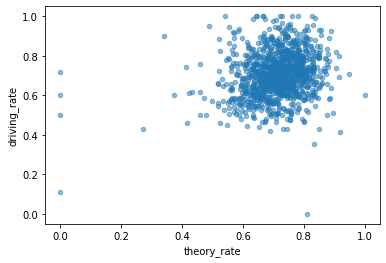

In [455]:
table.plot.scatter(x="theory_rate", y="driving_rate", alpha=0.5)

<AxesSubplot:xlabel='theory_rate', ylabel='driving_rate'>

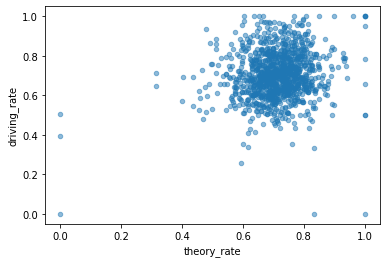

In [490]:
table2016.plot.scatter(x="theory_rate", y="driving_rate", alpha=0.5)

<AxesSubplot:xlabel='driving_done', ylabel='driving_rate'>

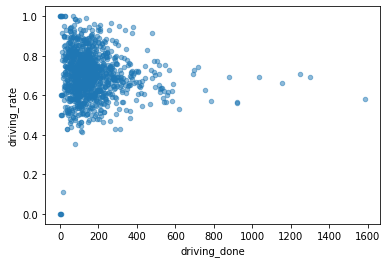

In [456]:
table.plot.scatter(x="driving_done", y="driving_rate", alpha=0.5)

In [562]:
table2016, summary2016 = prepare_table_b(2016)

In [563]:
table2015, summary2015 = prepare_table_b(2015)

<AxesSubplot:xlabel='theory_rate', ylabel='driving_rate'>

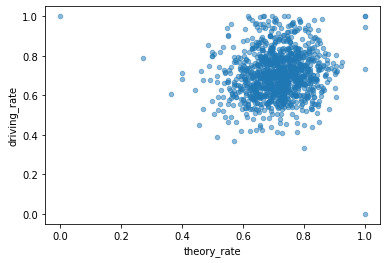

In [495]:
table2017, summary2017 = prepare_table_b(2017)
table2017.plot.scatter(x="theory_rate", y="driving_rate", alpha=0.5)

<AxesSubplot:>

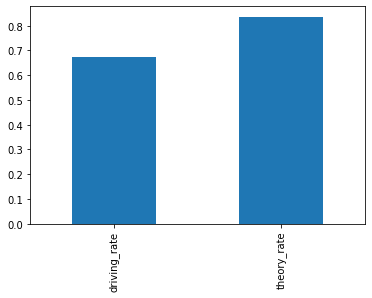

In [556]:
plt.figure();
table.loc['acp', ['driving_rate', 'theory_rate']].plot.bar()

In [578]:
contable.loc['2015', 'acp', ['driving_rate', 'theory_rate']] #.plot.bar()

IndexError: list index out of range

In [579]:
contable = pd.concat([table2015, table2016, table2017], keys=["2015", "2016", "2017"])

In [559]:
table2017

,n_ec,name_raw,theory_scheduled,theory_done,theory_rate,driving_scheduled,driving_done,driving_rate
k,,,,,,,,
automovel_club_de_portugal,1.0,Escola De Condução Automovel Club De Portugal,332,318,0.8050,421,411,0.6521
acp,2.0,Escola De Condução Acp,299,293,0.8362,353,350,0.6714
a_popular,5.0,Escola De Condução «A Popular»,54,53,0.8302,58,58,0.6724
automoveis_monumental,6.0,Escola De Condução Automoveis Monumental,299,287,0.8258,268,267,0.6854
a_desportiva_boavista,7.0,Escola De Condução A Desportiva (Boavista),140,130,0.8154,179,175,0.6343
...,...,...,...,...,...,...,...,...
alverca_rio,1401.0,ESCOLA DE CONDUÇÃO ALVERCA RIO,3,3,1.0000,0,0,NaN
novabela,1408.0,Escola De Condução Novabela,0,0,NaN,1,1,0.0000
75agv,1410.0,Escola De Condução 75agv,0,0,NaN,10,9,0.0000


In [580]:
contable

n_ec  \
     k                                                    
2015 automovel_club_de_portugal                     1.0   
     acp                                            2.0   
     a_popular                                      5.0   
     automoveis_monumental                          6.0   
     a_desportiva_boavista                          7.0   
...                                                 ...   
2017 alverca_rio                                 1401.0   
     novabela                                    1408.0   
     75agv                                       1410.0   
     regimento_de_sapadores_bombeiros_de_lisboa  3006.0   
     s_ind.                                         NaN   

                                                                                          name_raw  \
     k                                                                                               
2015 automovel_club_de_portugal                      Escola De Condução Automovel Club De Portugal   
     acp                                                                    Escola De Condução Acp   
     a_popular                                                      Escola De Condução «A Popular»   
     automoveis_monumental                                Escola De Condução Automoveis Monumental   
     a_desportiva_boavista                              Escola De Condução A Desportiva (Boavista)   
...                                                                                            ...   
2017 alverca_rio                                                    ESCOLA DE CONDUÇÃO ALVERCA RIO   
     novabela                                                          Escola De Condução Novabela   
     75agv                                                                Escola De Condução 75agv   
     regimento_de_sapadores_bombeiros_de_lisboa  Escola Do Regimento De Sapadores Bombeiros De ...   
     s_ind.                                                                                 S/IND.   

                                                 theory_scheduled  \
     k                                                              
2015 automovel_club_de_portugal                               308   
     acp                                                      296   
     a_popular                                                 59   
     automoveis_monumental                                    101   
     a_desportiva_boavista                                    231   
...                                                           ...   
2017 alverca_rio                                                3   
     novabela                                                   0   
     75agv                                                      0   
     regimento_de_sapadores_bombeiros_de_lisboa                 1   
     s_ind.                                                  1603   

                                                 theory_done  theory_rate  \
     k                                                                      
2015 automovel_club_de_portugal                          282       0.8050   
     acp                                                 289       0.8166   
     a_popular                                            57       0.6140   
     automoveis_monumental                                97       0.7423   
     a_desportiva_boavista                               226       0.6195   
...                                                      ...          ...   
2017 alverca_rio                                           3       1.0000   
     novabela                                              0          NaN   
     75agv                                                 0          NaN   
     regimento_de_sapadores_bombeiros_de_lisboa            1       0.0000   
     s_ind.                                             1448       0.6388   

                                                 driving